In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
class ChessBoard:
    def __init__(self,cols,rows,size):
        self.cols = cols-1
        self.rows = rows-1
        self.size = size
        self.objPoints()
    def objPoints(self):
        c = self.cols
        r = self.rows
        dim =3
        self.obj_p = np.zeros((c*r,dim),np.float32)
        self.obj_p[:,:2] = np.mgrid[0:c,0:r].T.reshape(-1,2)
        self.obj_p = self.obj_p * self.size
        
board = ChessBoard(10,7,24.0)
print('BOARD_INFO')
print('|- CORNER_COLS :',board.cols)
print('|- CORNER_ROWS :',board.rows)
print('|- PATTERN_SIZE:',board.size)
# print(board.obj_p)

BOARD_INFO
|- CORNER_COLS : 9
|- CORNER_ROWS : 6
|- PATTERN_SIZE: 24.0


In [3]:
# read images (recommend 10~15 images)
im_w = 640
im_h = 480
Images = np.empty((0,im_h,im_w,3),dtype=np.uint8)
imgs_name = glob.glob('undistort_imgs/*.png')
imgs_num = len(imgs_name)
for i in imgs_name:
    img = cv2.imread(i)
    if(img is None):
        print('imread failed:', i)
        continue
    print(i)
    '''
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    '''
    img = np.expand_dims(img,axis=0)
    Images = np.vstack((Images,img))
imgs__num = len(Images)
print(imgs_num,'IMAGES')

undistort_imgs/image00016.png
undistort_imgs/image00008.png
undistort_imgs/image00017.png
undistort_imgs/image00034.png
undistort_imgs/image00007.png
undistort_imgs/image00018.png
undistort_imgs/image00036.png
undistort_imgs/image00021.png
undistort_imgs/image00013.png
undistort_imgs/image00029.png
undistort_imgs/image00014.png
undistort_imgs/image00020.png
undistort_imgs/image00026.png
undistort_imgs/image00022.png
undistort_imgs/image00010.png
undistort_imgs/image00033.png
undistort_imgs/image00004.png
undistort_imgs/image00015.png
undistort_imgs/image00006.png
undistort_imgs/image00019.png
undistort_imgs/image00000.png
undistort_imgs/image00005.png
undistort_imgs/image00032.png
undistort_imgs/image00012.png
undistort_imgs/image00001.png
undistort_imgs/image00011.png
undistort_imgs/image00030.png
undistort_imgs/image00002.png
undistort_imgs/image00027.png
undistort_imgs/image00003.png
undistort_imgs/image00031.png
undistort_imgs/image00009.png
undistort_imgs/image00023.png
undistort_

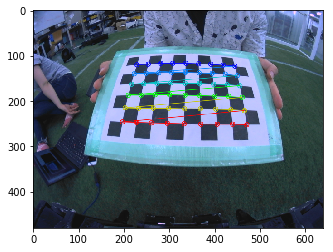

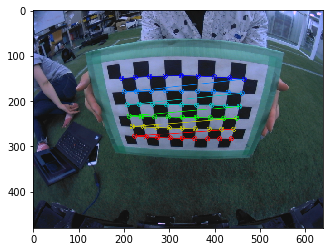

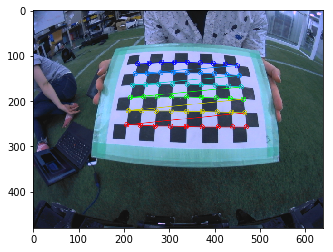

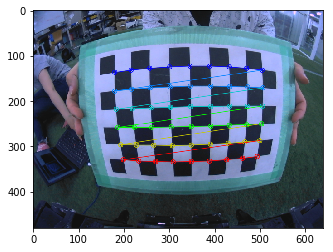

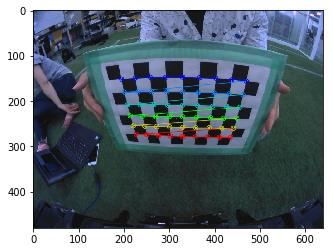

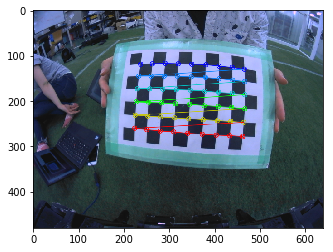

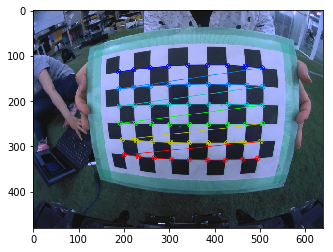

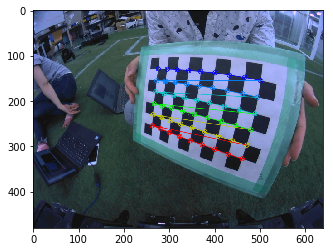

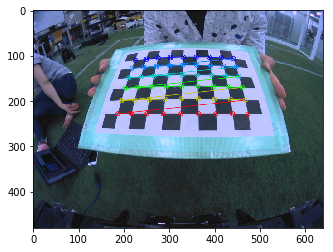

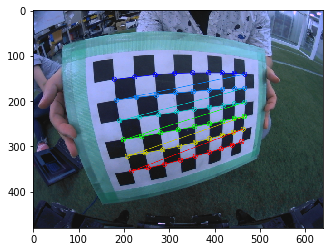

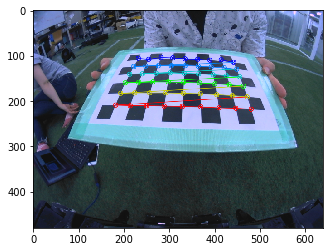

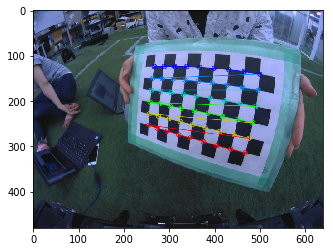

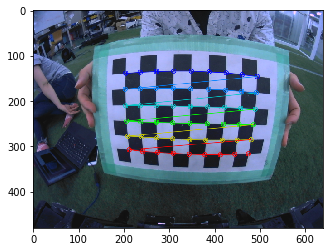

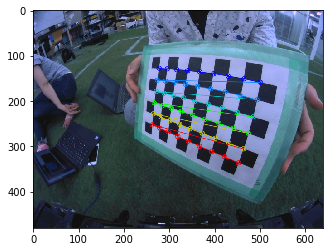

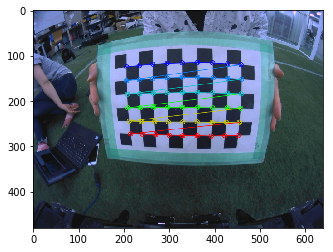

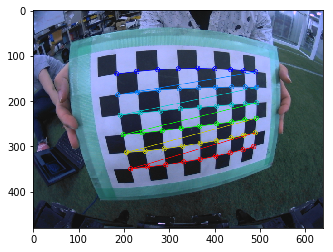

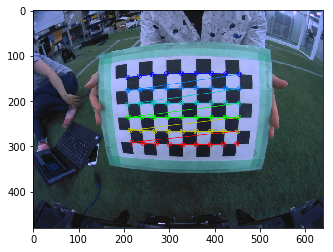

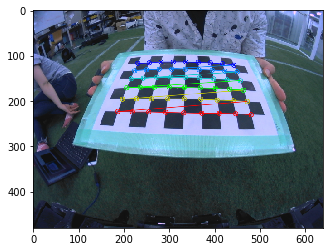

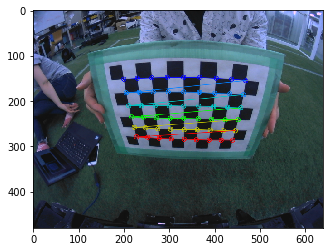

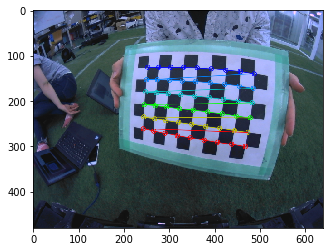

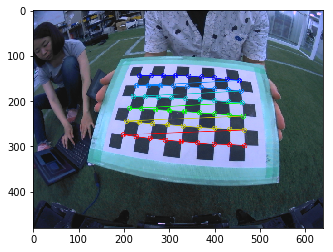

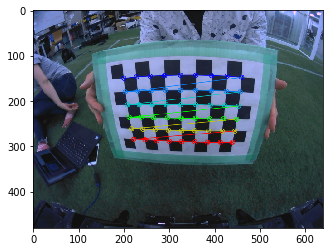

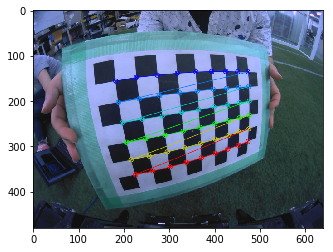

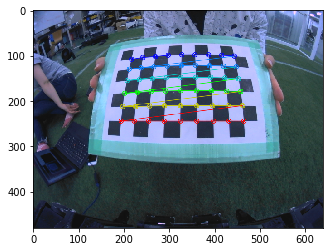

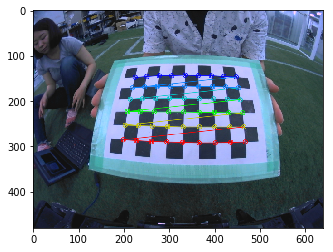

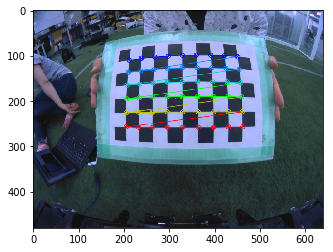

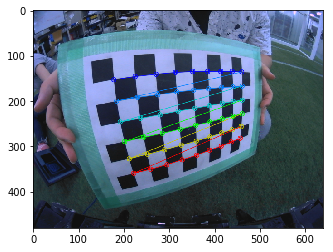

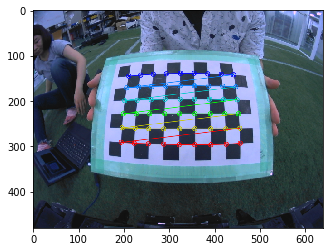

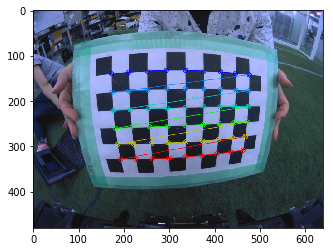

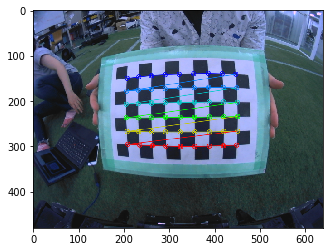

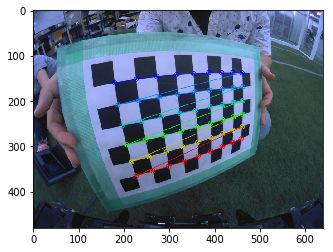

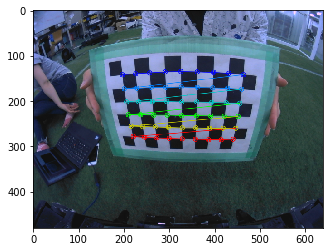

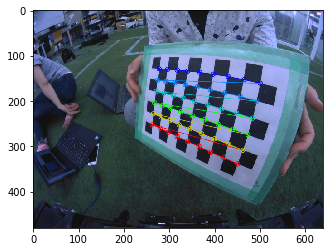

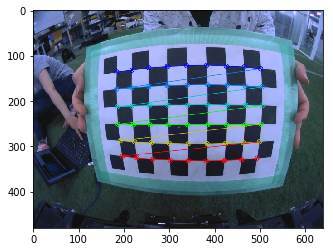

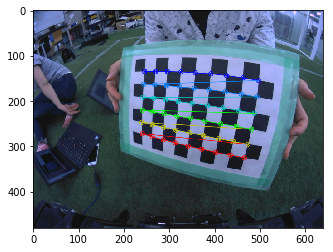

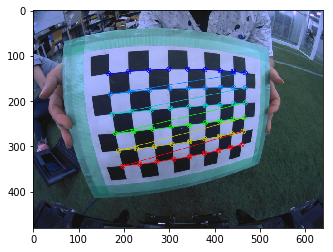

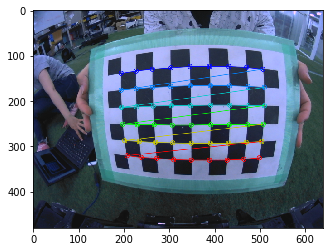

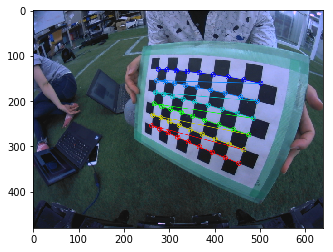

ImgPoints 38
ObjPoints 38


In [4]:
# detect chessboard corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
ImgPoints = []
ObjPoints = []
for i in range(len(Images)):
    img = Images[i].copy()
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img_gray,(board.cols,board.rows))
    if ret:
        corners2 = cv2.cornerSubPix(img_gray,corners,(11,11),(-1,-1),criteria)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        cv2.drawChessboardCorners(img_rgb, (board.cols,board.rows), corners2[0], ret)
        plt.imshow(img_rgb)
        plt.show()
        ImgPoints.append(corners2)
        ObjPoints.append(board.obj_p)
    else:
        print('corners detection failed.')
print('ImgPoints',len(ImgPoints))
print('ObjPoints',len(ObjPoints))

In [5]:
# calibrate
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(ObjPoints, ImgPoints,(im_h,im_w),None,None,None,None,cv2.CALIB_RATIONAL_MODEL)

In [6]:
print(mtx)
print(dist)

[[303.49085436   0.         329.68281193]
 [  0.         303.05414685 234.7956893 ]
 [  0.           0.           1.        ]]
[[-1.38168570e+01  8.05073703e+01  6.39814889e-04 -4.38894296e-04
   1.64925620e+01 -1.34722249e+01  7.57269100e+01  4.49389848e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [7]:
fx = mtx[0,0]/im_w
fy = mtx[1,1]/im_h
cx = mtx[0,2]/im_w
cy = mtx[1,2]/im_h
k0 = dist[0,0]
k1 = dist[0,1]
k2 = dist[0,2]
k3 = dist[0,3]
k4 = dist[0,4]
k5 = dist[0,5]
k6 = dist[0,6]
k7 = dist[0,7]

print('fx {:.7f}'.format(fx))
print('fy {:.7f}'.format(fy))
print('cx {:.7f}'.format(cx))
print('cy {:.7f}'.format(cy))
print('k0 {:.7f}'.format(k0))
print('k1 {:.7f}'.format(k1))
print('k2 {:.7f}'.format(k2))
print('k3 {:.7f}'.format(k3))
print('k4 {:.7f}'.format(k4))
print('k5 {:.7f}'.format(k5))
print('k6 {:.7f}'.format(k6))
print('k7 {:.7f}'.format(k7))

fx 0.4742045
fy 0.6313628
cx 0.5151294
cy 0.4891577
k0 -13.8168570
k1 80.5073703
k2 0.0006398
k3 -0.0004389
k4 16.4925620
k5 -13.4722249
k6 75.7269100
k7 44.9389848


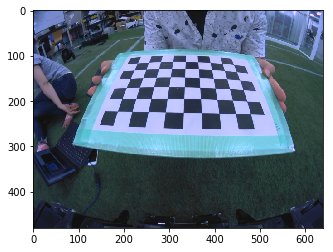

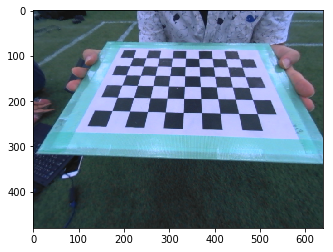

In [8]:
rand = np.random.randint(imgs_num)
img = Images[rand].copy()
img_und = cv2.undistort(img,mtx,dist)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_und_rgb = cv2.cvtColor(img_und,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
plt.imshow(img_und_rgb)
plt.show()